# Investigating Fandango Movie Ratings

This project looks at Fandango movie ratings to observe any bias that might be present. It is a follow-up analysis to [FiveThirtyEight's 2015 article](https://fivethirtyeight.com/features/fandango-movies-ratings/) showing strong bias in Fandango's ratings. We'll take a look at ratings of movies released after this article was published.

The goal will be to see if there were any changes to Fandango's ratings system after the article was written. To achieve this goal we will use the original data for the article [provided by FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/fandango) as well as Fandango scores collected in 2016 and 2017 available in a [publicly available data set](https://github.com/mircealex/Movie_ratings_2016_17).

## Understanding the Data

In [6]:
import pandas as pd

# Read files in.
movie_ratings_pre_2016 = pd.read_csv("fandango_score_comparison.csv")
movie_ratings_2016_2017 = pd.read_csv("movie_ratings_16_17.csv")

# Isolate fandango information.
fandango_ratings_orig = movie_ratings_pre_2016[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_ratings_new = movie_ratings_2016_2017[['movie','year','fandango']].copy()

fandango_ratings_orig.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [7]:
fandango_ratings_new.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Our goal here is to determine if there has been any change in Fandango's rating system after FiveThirtyEight's original analysis. The population of interest is ratings for all movies on Fandango's website. We want to sample this for two different time periods, prior to the original analysis and after.

We have the data by different time periods present in two different tables so we just have to check the methodology for getting each data set.

By looking at FiveThirtyEight's github [post sharing the data](https://github.com/fivethirtyeight/data/tree/master/fandango) we can see that they looked at movies that:

1. Had at least 30 fan reviews on Fandango's website at time of sampling.
2. The film must have had tickets on sale in 2015.

The sampling is not random, since some movies won't be included at all. One thing we have to be careful of is temporal trends. Some years may have a set of better received movies than other years.

Our [sample](https://github.com/mircealex/Movie_ratings_2016_17) of movies since the original analysis has the following properties:

1. Released in 2016 and before March 22, 2017.
2. Must have received a 'significat number of votes' although the significance is not clear.

These two samples will not be able to tell with great certainty whether or not the full ratings system on Fandango has changed since the original analysis. However, by changing the goal of our analysis a little we can produce some interesting findings.

## Changing the Goal of our Analysis

Both sets of data are limited to popular movies released during their respective timeframes. So we will change the goal of our analysis. Our new goal is to see if there is any difference in Fandango ratings of popular movies in 2015 and Fandango's ratings of popular movies in 2016. This is a fairly good proxy for our initial goal and the data samples we already have are now representative of what we need to look at.

## Isolating the Samples We Need

We need to make sure the movies in each sample are from the correct years. For the first data set we can pull the year ouf of the 'FILM' column.

In [11]:
fandango_ratings_orig['year'] = fandango_ratings_orig['FILM'].str[-5:-1]
fandango_ratings_orig.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


Now lets check the years of the movies in each data set.

In [13]:
fandango_ratings_orig['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [12]:
fandango_ratings_new['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Each data set has some movies from another year than we want to look at. Lets isolate our data sets to just movies released in 2015 and 2016, respectively.

In [19]:
ratings_15 = fandango_ratings_orig[fandango_ratings_orig['year'] == '2015'].copy()
ratings_16 = fandango_ratings_new[fandango_ratings_new['year'] == 2016].copy()

## Comparing Distribution Shapes for 2015 and 2016

We'll start our analysis by taking a high-level look at the shapes of our distributions of movie ratings for both samples.

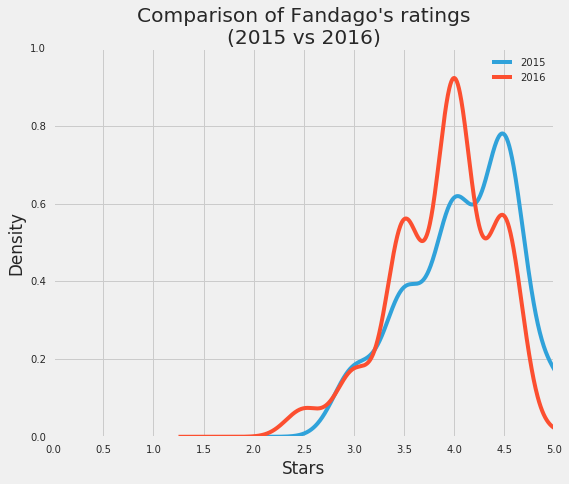

In [73]:
%matplotlib inline
from matplotlib import pyplot as plt
from numpy import arange

plt.style.use('fivethirtyeight')

ratings_15["Fandango_Stars"].plot.kde(label='2015',legend=True,figsize=(8,6.5))
ratings_16["fandango"].plot.kde(label='2016',legend=True)

plt.title("Comparison of Fandago\'s ratings\n(2015 vs 2016)")
plt.xlabel("Stars")
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel("Density")
plt.xticks(arange(0,5.1,.5))
plt.show()

Both distributions are skewed heavily to the left. However, 2016 is moved slightly left compared to 2016.

The fact thast both are skewed left indicates that fan ratings on Fandango rate movies very highly. As discussed in the FiveThirtyEight article, this seems dubious since Fandango also sells tickets.

The fact that the distribution moved left for 2016 indicates that Fandango's ratings of popular movies were lower in 2016 than in 2015. This confirms that there is indeed a difference in Fandango movie ratings between 2015 and 2016.

## Comparing Relative Frequencies

Lets look at the frequency distribution tables for our distrubitions.

In [30]:
fdt_15 = ratings_15["Fandango_Stars"].value_counts(normalize=True).sort_index()*100
fdt_16 = ratings_16["fandango"].value_counts(normalize=True).sort_index()*100
print("2015\n---------------")
print(fdt_15)
print("2016\n---------------")
print(fdt_16)

2015
---------------
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2016
---------------
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


The downward shift of the distributions of ratings is still apparent in our tables. Three things about the 2016 table stand out.

1. There are now movies with less than 3 star ratings (if only down to 2.5).
2. There is a significat decrease in the percent of movies with 4.5 or 5 stars.
3. There is now a spike at 4 stars instead of the largest group being 4.5 before.

## Determining the Direction of the Change

We'll take a look at some summary statistics to verify our suspected direction of change in ratings.

In [53]:
mean_15 = round(ratings_15["Fandango_Stars"].mean(),2)
median_15 = round(ratings_15["Fandango_Stars"].median(),2)
mode_15 = round(ratings_15["Fandango_Stars"].mode()[0],2)
mean_16 = round(ratings_16["fandango"].mean(),2)
median_16 = round(ratings_16["fandango"].median(),2)
mode_16 = round(ratings_16["fandango"].mode()[0],2)

summary = pd.DataFrame()
summary['2015'] = [mean_15,median_15,mode_15]
summary['2016'] = [mean_16,median_16,mode_16]
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.09,3.89
median,4.00,4.00
mode,4.50,4.00


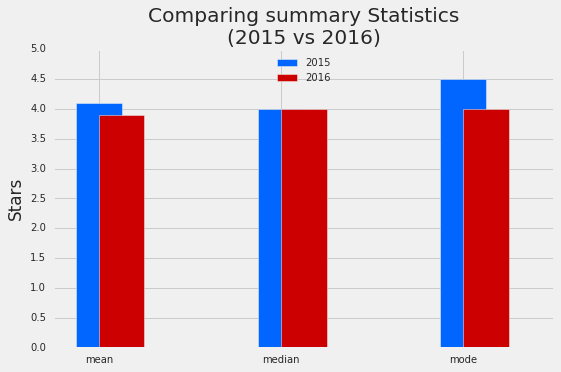

In [70]:
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                        rot = 0, figsize = (8,5))

plt.title("Comparing summary Statistics\n(2015 vs 2016)")
plt.ylim(0,5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc=9)
plt.show()

While the median rating is the same for both 2015 and 2016, the mean and mode both decreased, confirming that Fandango's ratings overall did overall become slightly lower.

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

While we can't be completely sure what caused the changes, it seems likely that the ratings system was changed as a response to the [article from FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/).